Slightly adapted version of Max's EDA notebook.

Findings to share about protective features in G-Test:
- 0.022 -> gender w/ class
- 0.009 -> foreign_worker w/ class

Findings from adjusted Cramer's-V test
- credit_history w/ class -> 0.240
- checking_status w/ class -> 0.348
- job w/ own_telephone -> 0.422

Point biserial test between numeric and categorical variables

Outliers checkings



In [1]:
import pandas as pd
import seaborn as sns
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt

raw_data = loadarff("dataset_31_credit-g.arff")
data = pd.DataFrame(raw_data[0])

data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


In [2]:
#Added the cell here for decoding the b'...' to normal string

for col, dtype in data.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        data[col] = data[col].apply(lambda x: x.decode("utf-8"))

In [3]:
data.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [4]:
# Check unique values of categorical variables
for col in data.columns[data.dtypes == "object"]:
    print(f"Column {col} has values {data[col].unique()}\n")

# Value "no known savings" of variable "savings_status" can be interpreted as a missing value
# Idem, but with "no known property" of variable "property_magnitude"

Column checking_status has values ['<0' '0<=X<200' 'no checking' '>=200']

Column credit_history has values ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

Column purpose has values ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

Column savings_status has values ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

Column employment has values ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

Column personal_status has values ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

Column other_parties has values ['none' 'guarantor' 'co applicant']

Column property_magnitude has values ['real estate' 'life insurance' 'no known property' 'car']

Column other_payment_plans has values ['none' 'bank' 'stores']

Column housing has values ['own' 'for free' 'rent']

Column job has values ['skilled' 'unskilled resident' 'high qualif/se

In [5]:
#Commented the cell here

## Problem: categorical variables have their values stored as bytes -> convert them to strings
#for col in data.columns[data.dtypes == "object"]:
#    data[col] = data[col].apply(lambda x: str(x)[1:].replace("'", ""))

In [6]:
# Set missing values:
# - "no known savings" of variable "savings_status"
# - "no known property" of variable "property_magnitude"

data["savings_status"] = data["savings_status"].replace({"no known savings": None})
data["property_magnitude"] = data["property_magnitude"].replace({"no known property": None})

In [7]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,None,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,None,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,None,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [8]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
#Added gender extraction here

genders = []
male_string = "male"
female_string = "female"

for status in data["personal_status"].values:
    if female_string in status:
        genders.append(female_string)
    elif male_string in status:
        genders.append(male_string)
    else:
        print("Found something interesting!")
        # This should no be printed because the definition of the data says that only "male"/"female" was an option
        # But it is good to have this here to check if the data is consistent

data["gender"] = genders

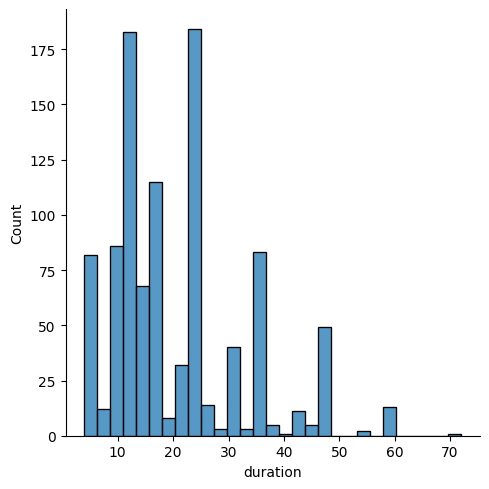

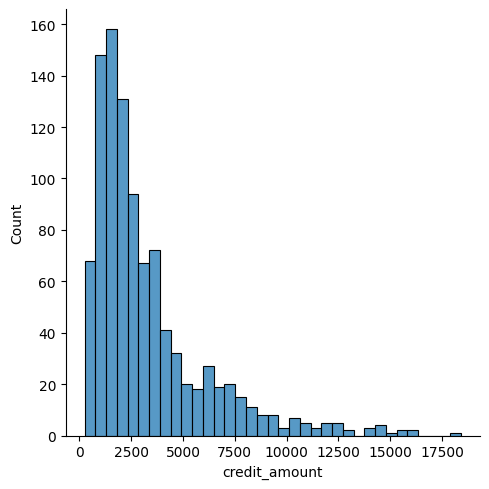

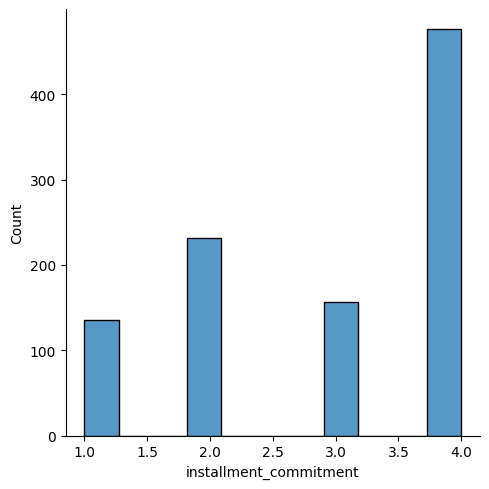

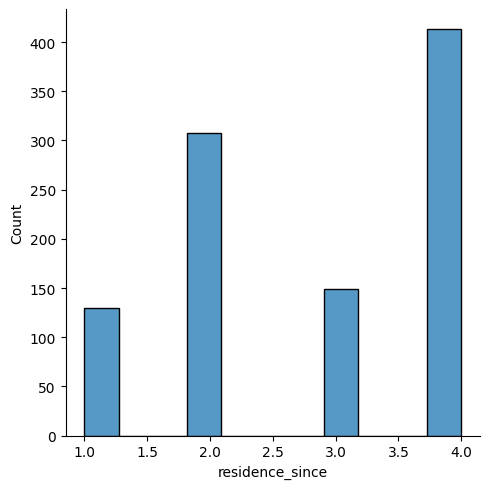

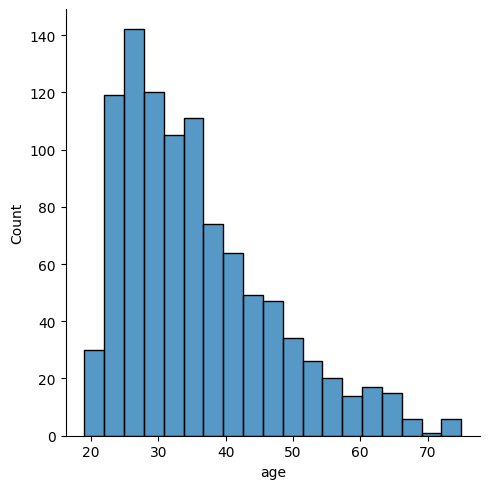

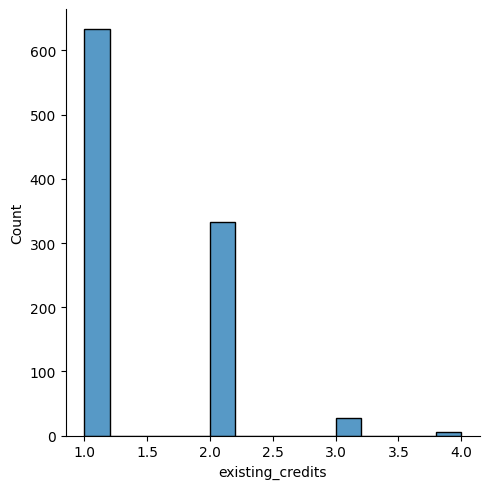

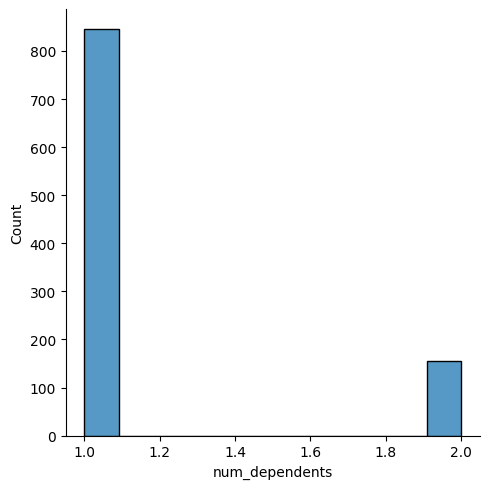

In [10]:
import seaborn as sns

numerical_features = list(data.columns[data.dtypes == "float64"])
categorical_features = list(data.columns[data.dtypes == "object"].drop("class"))

for col in numerical_features:
    sns.displot(data=data, x=col)

In [11]:
f = data["duration"].apply(lambda x: x in [12, 24, 36, 48, 60, 72])
print(f"{f.sum()} people pay of in x years")

508 people pay of in x years


In [12]:
for col in categorical_features + numerical_features:
    if data[col].dtype == "float64" and data[col].nunique() > 5:
        continue
    
    print(f"{data[col].value_counts()}\n")

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

savings_status
<100           603
100<=X<500     103
500<=X<1000     63
>=1000          48
Name: count, dtype: int64

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male

In [13]:
data.isna().sum()

checking_status             0
duration                    0
credit_history              0
purpose                     0
credit_amount               0
savings_status            183
employment                  0
installment_commitment      0
personal_status             0
other_parties               0
residence_since             0
property_magnitude        154
age                         0
other_payment_plans         0
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone               0
foreign_worker              0
class                       0
gender                      0
dtype: int64

In [14]:
from scipy.stats import chi2_contingency

count_variables = ["installment_commitment", "residence_since", "existing_credits", "num_dependents"]

discrete_variables = categorical_features + count_variables + ["class"]
continuous_variables = numerical_features[:]
for var in count_variables:
    continuous_variables.remove(var)

# Check for dependencies among variables:
# - Discrete w/ Discrete: G-Test
# - Discrete w/ Continuous:
#       * Mann-Whitney U Test           if two groups
#       * Kruskal-Wallis One-Way ANOVA  if more than two groups
# - Continuous w/ Continuous: Kendall’s Tau

for i in range(len(discrete_variables)):
    for j in range(i + 1, len(discrete_variables)):
        var1 = discrete_variables[i]
        var2 = discrete_variables[j]

        observed = pd.crosstab(data[var1], data[var2])
        _, p, _, _ = chi2_contingency(observed, lambda_="log-likelihood") # G-Test by lambda_="log-likelihood"
        
        if p < .05:
            print(f"{p:.3f} -> {var1} w/ {var2}")

# print("Categorical features that are correlated with the target:")
# for col in categorical_features:
#     observed = pd.crosstab(data[col], data["class"])
#     _, p, _, _ = chi2_contingency(observed, lambda_="log-likelihood")
#     
#     if p < .05:
#         print(f"{p:.3f} -> {col}")

# for i in range(len(categorical_features)):
#     for j in range(i + 1, len(categorical_features)):
#         col1 = categorical_features[i]
#         col2 = categorical_features[j]
# 
#         observed = pd.crosstab(data[col1], data[col2])
#         _, p, _, _ = chi2_contingency(observed, lambda_="log-likelihood")
#         
#         if p <= .05:
#             print(f"{p:.3f} -> {col1} w/ {col2}")

0.000 -> checking_status w/ credit_history
0.000 -> checking_status w/ purpose
0.000 -> checking_status w/ savings_status
0.005 -> checking_status w/ employment
0.000 -> checking_status w/ other_parties
0.004 -> checking_status w/ housing
0.001 -> checking_status w/ residence_since
0.034 -> checking_status w/ existing_credits
0.000 -> checking_status w/ class
0.000 -> credit_history w/ purpose
0.001 -> credit_history w/ employment
0.008 -> credit_history w/ personal_status
0.005 -> credit_history w/ other_parties
0.000 -> credit_history w/ other_payment_plans
0.018 -> credit_history w/ housing
0.007 -> credit_history w/ gender
0.000 -> credit_history w/ existing_credits
0.000 -> credit_history w/ class
0.009 -> purpose w/ employment
0.000 -> purpose w/ personal_status
0.000 -> purpose w/ other_parties
0.000 -> purpose w/ property_magnitude
0.004 -> purpose w/ other_payment_plans
0.000 -> purpose w/ housing
0.000 -> purpose w/ job
0.000 -> purpose w/ own_telephone
0.002 -> purpose w/ fo

<Axes: xlabel='age', ylabel='credit_amount'>

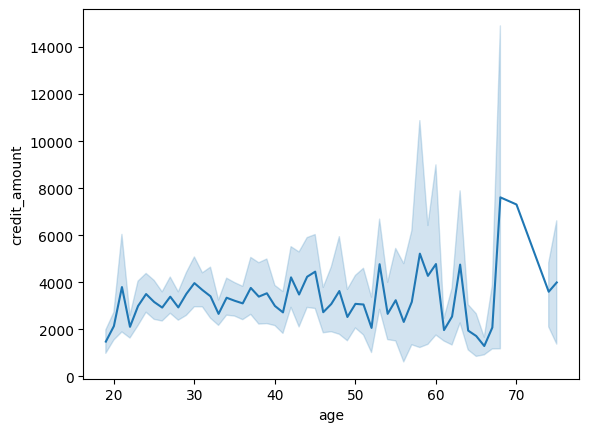

In [15]:
sns.lineplot(data=data, x="age", y="credit_amount")

## Added part here:

### Cramer's-V

In [16]:
import numpy as np

def cramers_v_corrected(selected_data: pd.DataFrame) -> float:
    """
    Cramer's V statistic with bias correction according to Bergsma, Wicher (2013).
    "A bias correction for Cramér's V and Tschuprow's T".
    Journal of the Korean Statistical Society. 42 (3): 323–328. doi:10.1016/j.jkss.2012.10.002.

    Args:
        selected_data (pd.DataFrame): DataFrame with the 2 variables that we want to compute the statistic over

    Returns:
        float: returns the Cramer's V statistic with bias correction
    """
    chi2 = chi2_contingency(selected_data)[0]
    n = np.sum(selected_data)
    
    phi2 = chi2/n
    r, k = selected_data.shape[0], selected_data.shape[1]

    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    

    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [17]:
# Adjusted cramers's V statistic according to Wikipedia

for i in range(len(discrete_variables)):
    for j in range(i + 1, len(discrete_variables)):
        var1 = discrete_variables[i]
        var2 = discrete_variables[j]

        observed = pd.crosstab(data[var1], data[var2])
        cv_value = cramers_v_corrected(observed.values)
        if cv_value > .2:
            print(f"{var1} w/ {var2} -> {cv_value:.3f}")

checking_status w/ class -> 0.348
credit_history w/ other_payment_plans -> 0.206
credit_history w/ existing_credits -> 0.373
credit_history w/ class -> 0.240
employment w/ job -> 0.305
employment w/ gender -> 0.214
employment w/ residence_since -> 0.254
personal_status w/ gender -> 0.999
personal_status w/ num_dependents -> 0.279
housing w/ gender -> 0.228
housing w/ residence_since -> 0.231
job w/ own_telephone -> 0.422


In [18]:
def cramers_v(selected_data: pd.DataFrame) -> float:
    """
    Original Cramer's V statistic.

    Args:
        selected_data (pd.DataFrame): DataFrame with the 2 variables that we want to compute the statistic over

    Returns:
        float: returns the Cramer's V statistic
    """
    chi2 = chi2_contingency(selected_data)[0]
    n = np.sum(selected_data)
    
    phi2 = chi2/n
    r, k = selected_data.shape[0], selected_data.shape[1]

    return np.sqrt(phi2 / min((k-1), (r-1)))

In [19]:
# Normal Cramer's-V statistic

for i in range(len(discrete_variables)):
    for j in range(i + 1, len(discrete_variables)):
        var1 = discrete_variables[i]
        var2 = discrete_variables[j]

        observed = pd.crosstab(data[var1], data[var2])
        cv_value = cramers_v(observed.values)
        if cv_value > .2:
            print(f"{var1} w/ {var2} -> {cv_value:.3f}")

checking_status w/ class -> 0.352
credit_history w/ other_payment_plans -> 0.215
credit_history w/ existing_credits -> 0.378
credit_history w/ class -> 0.248
purpose w/ housing -> 0.210
purpose w/ job -> 0.203
purpose w/ own_telephone -> 0.221
employment w/ job -> 0.311
employment w/ gender -> 0.223
employment w/ residence_since -> 0.261
personal_status w/ housing -> 0.202
personal_status w/ gender -> 1.000
personal_status w/ num_dependents -> 0.284
housing w/ gender -> 0.232
housing w/ residence_since -> 0.237
job w/ own_telephone -> 0.426
gender w/ num_dependents -> 0.200


### Point biserial

In [61]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

for i in range(len(numerical_features)):
    for j in range(len(categorical_features)):
        var1 = numerical_features[i]
        var2 = categorical_features[j]

        le = LabelEncoder()
        le.fit(data[var2])
        y_prime = le.transform(data[var2])

        r_stat, p_value = pointbiserialr(x = y_prime, y = data[var1])
        if p_value < .05:
            print(f"{var1} w/ {var2} -> {p_value:.3f}")

duration w/ checking_status -> 0.002
duration w/ personal_status -> 0.002
duration w/ housing -> 0.000
duration w/ job -> 0.000
duration w/ own_telephone -> 0.000
duration w/ foreign_worker -> 0.000
duration w/ gender -> 0.010
credit_amount w/ checking_status -> 0.003
credit_amount w/ savings_status -> 0.027
credit_amount w/ personal_status -> 0.000
credit_amount w/ housing -> 0.000
credit_amount w/ job -> 0.000
credit_amount w/ own_telephone -> 0.000
credit_amount w/ gender -> 0.003
installment_commitment w/ employment -> 0.018
installment_commitment w/ personal_status -> 0.000
installment_commitment w/ housing -> 0.005
installment_commitment w/ job -> 0.014
installment_commitment w/ foreign_worker -> 0.004
installment_commitment w/ gender -> 0.006
residence_since w/ credit_history -> 0.006
residence_since w/ purpose -> 0.047
residence_since w/ employment -> 0.000
residence_since w/ property_magnitude -> 0.001
residence_since w/ own_telephone -> 0.003
age w/ checking_status -> 0.008
a

# Outliers

In [20]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Age

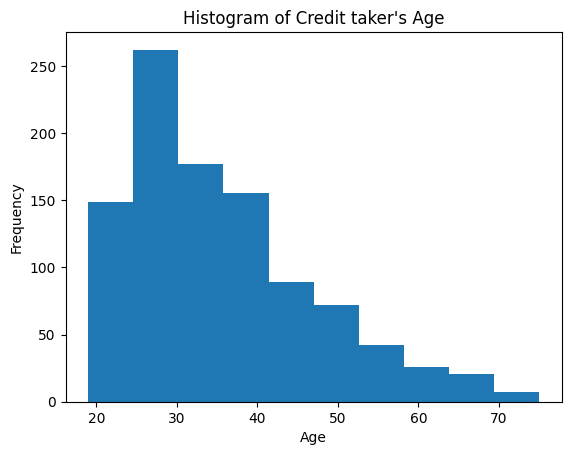

In [37]:
plt.hist(data["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Credit taker's Age")
plt.show()

In [39]:
data[data["age"] > 70] #some old people, mostly with good credit rep, only 1 with bad credit rep

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender
186,0<=X<200,9.0,all paid,used car,5129.0,<100,>=7,2.0,female div/dep/mar,none,...,74.0,bank,for free,1.0,high qualif/self emp/mgmt,2.0,yes,yes,bad,female
330,<0,24.0,critical/other existing credit,used car,6615.0,<100,unemployed,2.0,male single,none,...,75.0,none,for free,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male
430,no checking,5.0,existing paid,business,3448.0,<100,4<=X<7,1.0,male single,none,...,74.0,none,own,1.0,unskilled resident,1.0,none,yes,good,male
536,<0,6.0,existing paid,new car,1374.0,None,unemployed,4.0,female div/dep/mar,none,...,75.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,female
606,no checking,24.0,critical/other existing credit,business,4526.0,<100,1<=X<4,3.0,male single,none,...,74.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male
756,>=200,6.0,critical/other existing credit,new car,1299.0,<100,1<=X<4,1.0,male single,none,...,74.0,none,own,3.0,unemp/unskilled non res,2.0,none,no,good,male


## Credit amount

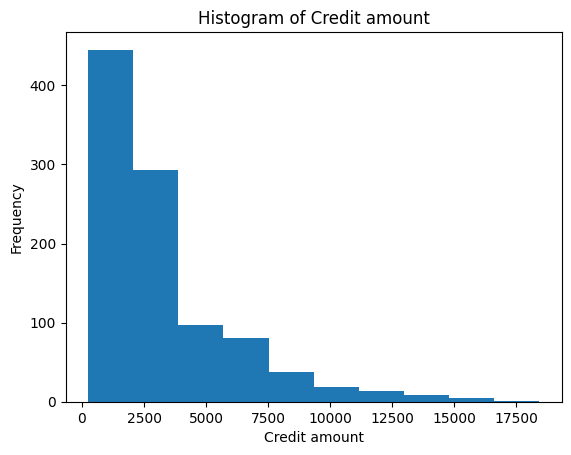

In [40]:
plt.hist(data["credit_amount"])
plt.xlabel("Credit amount")
plt.ylabel("Frequency")
plt.title("Histogram of Credit amount")
plt.show()

In [44]:
data[data["credit_amount"] > 15000] #so they are not all bad when they are above 15K

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender
95,0<=X<200,54.0,no credits/all paid,business,15945.0,<100,<1,3.0,male single,none,...,58.0,none,rent,1.0,skilled,1.0,yes,yes,bad,male
637,no checking,60.0,delayed previously,radio/tv,15653.0,<100,4<=X<7,2.0,male single,none,...,21.0,none,own,2.0,skilled,1.0,yes,yes,good,male
818,<0,36.0,existing paid,other,15857.0,<100,unemployed,2.0,male div/sep,co applicant,...,43.0,none,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,good,male
887,0<=X<200,48.0,existing paid,business,15672.0,<100,1<=X<4,2.0,male single,none,...,23.0,none,own,1.0,skilled,1.0,yes,yes,bad,male
915,0<=X<200,48.0,no credits/all paid,other,18424.0,<100,1<=X<4,1.0,female div/dep/mar,none,...,32.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,yes,no,bad,female


## Duration

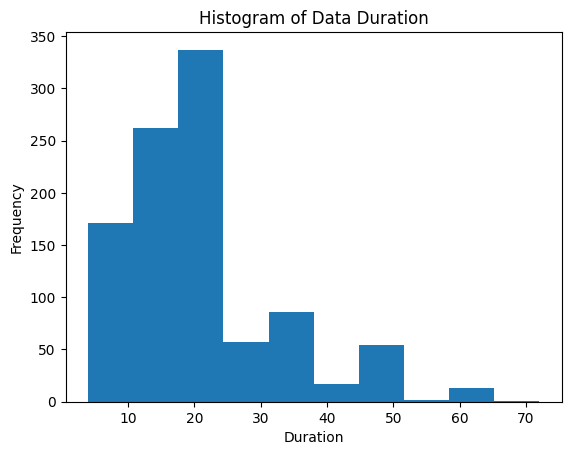

In [21]:
plt.hist(data["duration"])
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Credit Duration")
plt.show()


In [24]:
data[data["duration"] >= 60] #lot of 60 durations, which seems okay as 60/12 = 5 years

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender
29,<0,60.0,delayed previously,business,6836.0,<100,>=7,3.0,male single,none,...,63.0,none,own,2.0,skilled,1.0,yes,yes,bad,male
134,no checking,60.0,existing paid,radio/tv,10144.0,100<=X<500,4<=X<7,2.0,female div/dep/mar,none,...,21.0,none,own,1.0,skilled,1.0,yes,yes,good,female
255,0<=X<200,60.0,delayed previously,radio/tv,7418.0,None,1<=X<4,1.0,male single,none,...,27.0,none,own,1.0,unskilled resident,1.0,none,yes,good,male
332,0<=X<200,60.0,existing paid,new car,7408.0,100<=X<500,<1,4.0,female div/dep/mar,none,...,24.0,none,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,bad,female
373,no checking,60.0,critical/other existing credit,new car,13756.0,None,>=7,2.0,male single,none,...,63.0,bank,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male
374,0<=X<200,60.0,all paid,other,14782.0,100<=X<500,>=7,3.0,female div/dep/mar,none,...,60.0,bank,for free,2.0,high qualif/self emp/mgmt,1.0,yes,yes,bad,female
616,0<=X<200,60.0,delayed previously,radio/tv,9157.0,None,1<=X<4,2.0,male single,none,...,27.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,none,yes,good,male
637,no checking,60.0,delayed previously,radio/tv,15653.0,<100,4<=X<7,2.0,male single,none,...,21.0,none,own,2.0,skilled,1.0,yes,yes,good,male
672,no checking,60.0,existing paid,new car,10366.0,<100,>=7,2.0,male single,none,...,42.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male
677,0<=X<200,72.0,existing paid,radio/tv,5595.0,100<=X<500,1<=X<4,2.0,male mar/wid,none,...,24.0,none,own,1.0,skilled,1.0,none,yes,bad,male


In [28]:
display(data[data["duration"] > 60]) #a bit weird as 72/12 = 6 years

print(data.iloc[677])

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender
677,0<=X<200,72.0,existing paid,radio/tv,5595.0,100<=X<500,1<=X<4,2.0,male mar/wid,none,...,24.0,none,own,1.0,skilled,1.0,none,yes,bad,male


checking_status                0<=X<200
duration                           72.0
credit_history            existing paid
purpose                        radio/tv
credit_amount                    5595.0
savings_status               100<=X<500
employment                       1<=X<4
installment_commitment              2.0
personal_status            male mar/wid
other_parties                      none
residence_since                     2.0
property_magnitude                  car
age                                24.0
other_payment_plans                none
housing                             own
existing_credits                    1.0
job                             skilled
num_dependents                      1.0
own_telephone                      none
foreign_worker                      yes
class                               bad
gender                             male
Name: 677, dtype: object


In [34]:
display(data[(data["duration"] >= 49) & (data["duration"] < 60)]) #only 2 in this category. 54/12 = 4.5 years

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender
78,no checking,54.0,no credits/all paid,used car,9436.0,None,1<=X<4,2.0,male single,none,...,39.0,none,own,1.0,unskilled resident,2.0,none,yes,good,male
95,0<=X<200,54.0,no credits/all paid,business,15945.0,<100,<1,3.0,male single,none,...,58.0,none,rent,1.0,skilled,1.0,yes,yes,bad,male


In [35]:
print(data.iloc[78])

checking_status                   no checking
duration                                 54.0
credit_history            no credits/all paid
purpose                              used car
credit_amount                          9436.0
savings_status                           None
employment                             1<=X<4
installment_commitment                    2.0
personal_status                   male single
other_parties                            none
residence_since                           2.0
property_magnitude             life insurance
age                                      39.0
other_payment_plans                      none
housing                                   own
existing_credits                          1.0
job                        unskilled resident
num_dependents                            2.0
own_telephone                            none
foreign_worker                            yes
class                                    good
gender                            

In [36]:
print(data.iloc[95])

checking_status                      0<=X<200
duration                                 54.0
credit_history            no credits/all paid
purpose                              business
credit_amount                         15945.0
savings_status                           <100
employment                                 <1
installment_commitment                    3.0
personal_status                   male single
other_parties                            none
residence_since                           4.0
property_magnitude                       None
age                                      58.0
other_payment_plans                      none
housing                                  rent
existing_credits                          1.0
job                                   skilled
num_dependents                            1.0
own_telephone                             yes
foreign_worker                            yes
class                                     bad
gender                            